In [1]:
import os
import cv2
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

DATA_RAW_PATH = os.path.abspath(os.path.join(
    os.getcwd(), "../data/raw"))
DATA_OUTPUT_PATH = os.path.abspath(os.path.join(os.getcwd(), "../data/output"))

# To get the example images that below worked on please first run the download_assets.py file

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

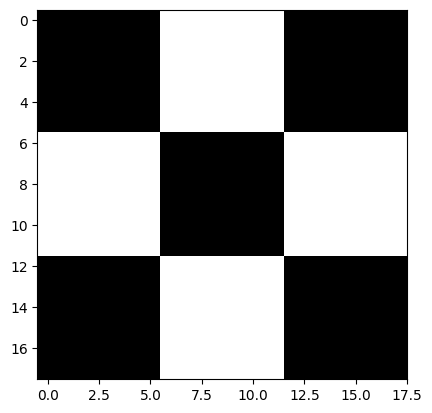

In [2]:
cb_image_path = f"{DATA_RAW_PATH}/checkerboard_18x18.png"

# reading on gray scale mode
cb_image_gry = cv2.imread(cb_image_path, cv2.IMREAD_GRAYSCALE)
Image(cb_image_path)

print(cb_image_gry)
plt.imshow(cb_image_gry, cmap="gray")

##### Accessing Individual Pixels
- matrix[r,c], where the r is the row number and c is the column number. 

In [3]:
print(cb_image_gry[0, 0])
print(cb_image_gry[2, 6])

0
255


##### Modifying Image Pixels

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255 175   0   0   0   0 175 255 255 255 255 255 255]
 [255 255 255 255 255 255   0 175   0   0 175   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0 175 175   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0 175 175   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0 175   0   0 175   0 255 255 255 255 255 255]
 [255 255 255 255 255 255 175   0   0   0   0 175 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

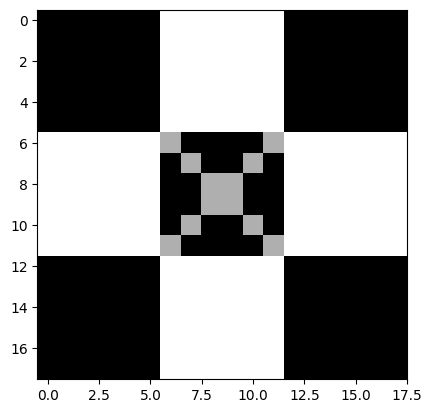

In [4]:
cb_image_gry_copy = cb_image_gry.copy()

k = 11
for row in range (6, 12):
    cb_image_gry_copy[row][row] = 175
    cb_image_gry_copy[row][k] = 175
    k -= 1
    
print(cb_image_gry_copy)
plt.imshow(cb_image_gry_copy, cmap="gray")

##### Cropping Images

Image size (H, W,C):  (600, 903, 3)
Image data type:  uint8


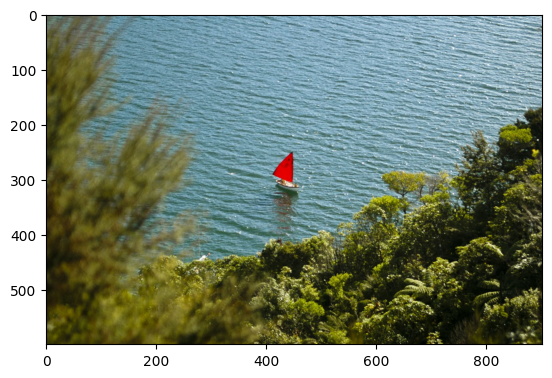

In [5]:
img_new_zelan_path = f"{DATA_RAW_PATH}/New_Zealand_Boat.jpg"

img_new_zelan_bgr = cv2.imread(img_new_zelan_path, cv2.IMREAD_COLOR)

print("Image size (H, W,C): ", img_new_zelan_bgr.shape)
print("Image data type: ", img_new_zelan_bgr.dtype)

img_new_zeland_rgb = cv2.cvtColor(img_new_zelan_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_new_zeland_rgb)

##### Crop out the middle region of the image


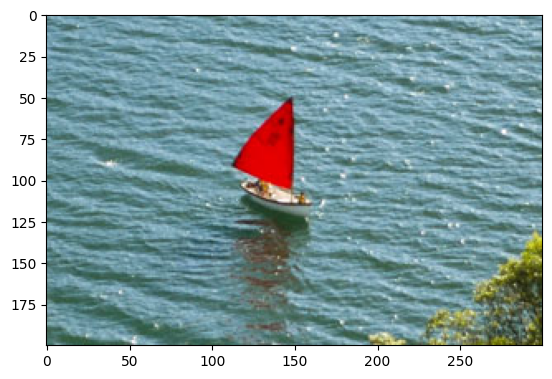

In [6]:
cropped_region = img_new_zeland_rgb[200:400, 300:600]
plt.imshow(cropped_region)

#### Resizing Images

The function **`resize`** resizes the image `src` down to or up to the specified size. The size and type are derived from the `src`,`dsize`,`fx`, and `fy`.

##### <font style="color:rgb(8,133,37)">Function Syntax </font>

``` python
dst = resize( src, dsize[, dst[, fx[, fy[, interpolation]]]] )
```

`dst`: output image; it has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.

The function has **2 required arguments**:
    
1. `src`:	input image

2. `dsize`: output image size

Optional arguments that are often used include:

1. `fx`: Scale factor along the horizontal axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜

2. `fy`: Scale factor along the vertical axis; when it equals 0, it is computed as (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜

The output image has the size `dsize` (when it is non-zero) or the size computed from `src.size()`, `fx`, and `fy`; the type of dst is the same as of src.

##### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`resize()`**: <a href="https://docs.opencv.org/4.5.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d" target="_blank">Documentation link</a>

##### Choice of Interpolation Method for Resizing:

- **cv2.INTER_AREA**: This is used when we need to shrink an image.
- **cv2.INTER_CUBIC**: This is slow but more efficient.
- **cv2.INTER_LINEAR**: This is primarily used when zooming is required. This is the default interpolation technique in OpenCV.


##### Parameters of resize():

- **source**: Input Image array (Single-channel, 8-bit or floating-point) 
- **dsize**: Size of the output array
- **dest**: Output array (Similar to the dimensions and type of Input image array) [optional]
- **fx**: Scale factor along the horizontal axis  [optional]
- **fy**: Scale factor along the vertical axis  [optional]
- **interpolation**: One of the above interpolation methods  [optional]


##### **Method 1**: Specifying Scaling Factor using fx and fy

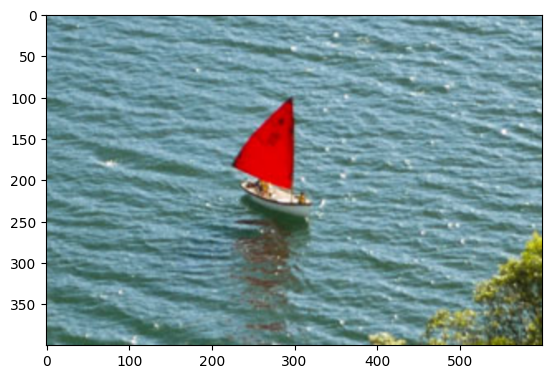

In [7]:
resized_img_2x = cv2.resize(cropped_region, None, fx=2, fy=2)
plt.imshow(resized_img_2x)

##### **Method 2**: Specifying exact size of the output image

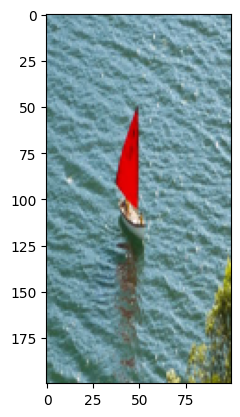

In [8]:
width = 100
height = 200
dim = (width, height)

resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

##### Resize while maintaining aspect ratio

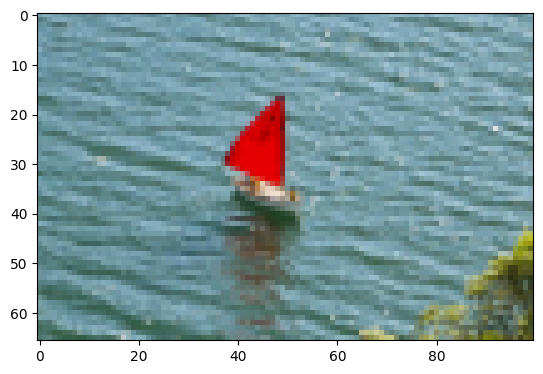

In [9]:
desired_width = 100
aspect_ratio = 100 / img_new_zelan_bgr.shape[1]
desired_height = int(aspect_ratio * img_new_zelan_bgr.shape[0])

dim = (desired_width, desired_height)

resized_cropped_region = cv2.resize(cropped_region, dsize=dim, interpolation=cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

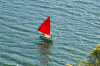

In [10]:
img_save_path = f"{DATA_OUTPUT_PATH}/resized_cropped_region_2x.png"
resized_cropped_region_rgb = cv2.cvtColor(
    resized_cropped_region, cv2.COLOR_BGR2RGB)

cv2.imwrite(img_save_path, resized_cropped_region_rgb)

Image(filename=img_save_path)

#### Flipping Images


The function **`flip`** flips the array in one of three different ways (row and column indices are 0-based):

##### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
dst = cv.flip( src, flipCode )
```

`dst`: output array of the same size and type as src.

The function has **2 required arguments**:
    
1. `src`:	input image
2. `flipCode`: a flag to specify how to flip the array; 0 means flipping around the x-axis and positive value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.


##### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

**`flip`**: <a href="https://docs.opencv.org/4.5.0/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441" target="_blank">Documentation link</a>

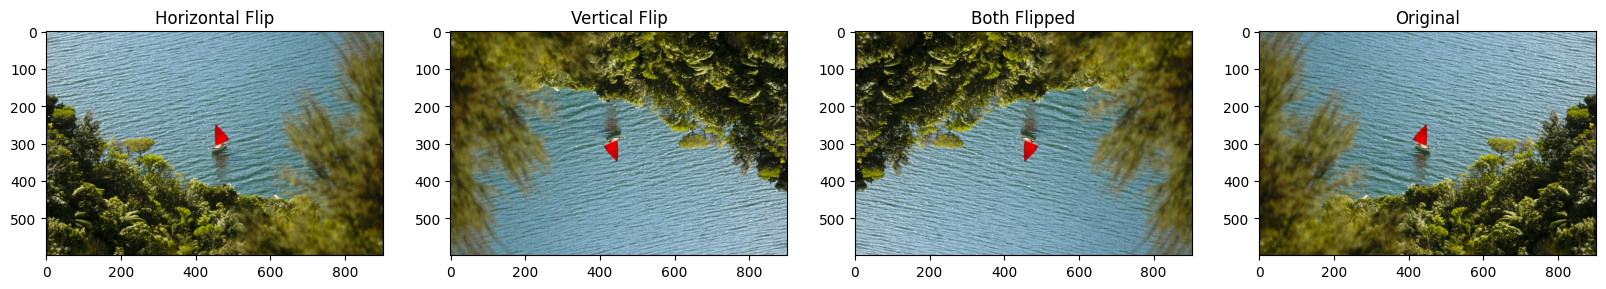

In [11]:
img_new_zeland_rgb_flipped_horz = cv2.flip(img_new_zeland_rgb, 1)
img_new_zeland_rgb_flipped_vert = cv2.flip(img_new_zeland_rgb, 0)
img_new_zeland_rgb_flipped_both = cv2.flip(img_new_zeland_rgb, -1)

images_map = {
    "Horizontal Flip": img_new_zeland_rgb_flipped_horz,
    "Vertical Flip":  img_new_zeland_rgb_flipped_vert,
    "Both Flipped":   img_new_zeland_rgb_flipped_both,
    "Original":   img_new_zeland_rgb
}

plt.figure(figsize=[20, 10])

i = 1
for key in images_map:
    plt.subplot(1,4, i)
    plt.imshow(images_map[key])
    plt.title(key)
    i += 1
    